In [ ]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sns

In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
test_df.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, train_df['Embarked'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_df['Sex'] = label_encoder.fit_transform(train_df['Sex']) 
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked']) 

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


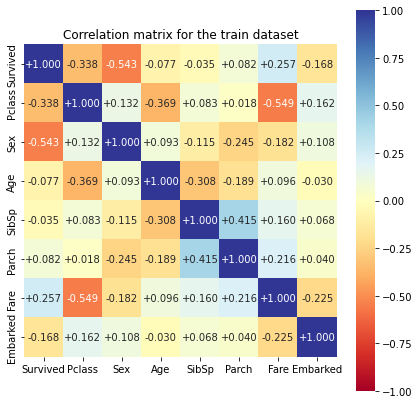

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(train_df.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the train dataset")
plt.show()

In [ ]:
!pip install datawig
import datawig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = train_df.copy()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

df_knn = train_df.filter(['Age','Survived','Sex','Fare','Embarked'], axis=1).copy()
#scaler = MinMaxScaler(feature_range=(0, 1))
#df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [ ]:
df_knn_imputed[60:70]

,Age,Survived,Sex,Fare,Embarked
60,22.0,0.0,1.0,7.2292,0.0
61,38.0,1.0,0.0,80.0000,2.0
62,45.0,0.0,1.0,83.4750,2.0
63,4.0,0.0,1.0,27.9000,2.0
64,38.6,0.0,1.0,27.7208,0.0
65,20.0,1.0,1.0,15.2458,0.0
66,29.0,1.0,0.0,10.5000,2.0
67,19.0,0.0,1.0,8.1583,2.0
68,17.0,1.0,0.0,7.9250,2.0
69,26.0,0.0,1.0,8.6625,2.0


In [ ]:
train_df['Age'] = df_knn_imputed['Age']

In [ ]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
'''df_knn = train_df.filter(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], axis=1).copy()
#scaler = MinMaxScaler(feature_range=(0, 1))
#df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)'''

In [ ]:
#df_knn_imputed[60:70]

In [ ]:
df_train, df_test = datawig.utils.random_split(data)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Survived', 'Sex', 'Fare', 'Embarked'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

In [ ]:
imputed.head(60)


In [ ]:
imputed.info()

In [ ]:
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex']) 
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked']) 

In [ ]:
test_df['Fare'] = test_df['Fare'].replace(np.nan, test_df['Fare'].mean())

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
dftt_knn = test_df.filter(['Age','Survived','Sex','Fare','Embarked'], axis=1).copy()
#scaler = MinMaxScaler(feature_range=(0, 1))
#df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
tt_knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
dftt_knn_imputed = pd.DataFrame(tt_knn_imputer.fit_transform(dftt_knn), columns=dftt_knn.columns)

In [ ]:
test_df['Age'] = dftt_knn_imputed['Age']

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
## Import dependecies
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

x_train = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_df[['Survived']]

In [ ]:
from 

In [ ]:
# Se guarda el modelo en una variable
clf = DecisionTreeClassifier()

# Se entrena el modelo de árbol de decisión
clf = clf.fit(x_train,y_train)

In [ ]:
x_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [ ]:
x_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
resultados = pd.DataFrame(test_df['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
resultados['Survived'] = y_pred
resultados

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
resultados.to_csv('Results.csv', index=False)

In [2]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [25]:
train.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [27]:
train['Embarked'] = train['Embarked'].replace(np.nan, train['Embarked'].mode()[0])
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
train.rename({'Sex_male': 'Sex'}, axis=1, inplace=True)
train = pd.get_dummies(train, columns=['Embarked'], drop_first=False)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [67]:
train.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

In [29]:
test['Fare'] = test['Fare'].replace(np.nan, test['Fare'].mean())
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)
test.rename({'Sex_male': 'Sex'}, axis=1, inplace=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=False)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1,0,0,1
414,1,39.0,0,0,108.9000,0,1,0,0
415,3,38.5,0,0,7.2500,1,0,0,1
416,3,NaN,0,0,8.0500,1,0,0,1


In [65]:
test.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

In [68]:
no_age = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']
predictors_set = [no_age]
objectives = ['Age']
train_hat = train.copy()
train_hat['Age'] = train_hat['Age'].fillna(0)
train_hat

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,0.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [69]:
k = 5
for predictors, objective in zip(predictors_set, objectives):
    X = train_hat[train_hat[predictors].isin([0]).any(axis=1).apply(lambda x: not x)]
    y = X[objective]
    X = X.drop(columns=objective)
    kNN_model = KNeighborsRegressor(n_neighbors=k).fit(X,y)
    X_hat = train_hat[train_hat[objective] == 0].drop(columns=objective)
    train_hat.loc[train_hat[objective] == 0, objective] = kNN_model.predict(X_hat)
train_hat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Sex       891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [70]:
train_hat[60:70]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
60,0,3,22.0,0,0,7.2292,1
61,1,1,38.0,0,0,80.0000,0
62,0,1,45.0,1,0,83.4750,1
63,0,3,4.0,3,2,27.9000,1
64,0,1,23.0,0,0,27.7208,1
65,1,3,6.4,1,1,15.2458,1
66,1,2,29.0,0,0,10.5000,0
67,0,3,19.0,0,0,8.1583,1
68,1,3,17.0,4,2,7.9250,0
69,0,3,26.0,2,0,8.6625,1


In [71]:
test_hat = test.copy()
test_hat['Age'] = test_hat['Age'].fillna(0)
test_hat

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,0.0,0,0,8.0500,1
414,1,39.0,0,0,108.9000,0
415,3,38.5,0,0,7.2500,1
416,3,0.0,0,0,8.0500,1


In [72]:
k = 5
for predictors, objective in zip(predictors_set, objectives):
    X = test_hat[test_hat[predictors].isin([0]).any(axis=1).apply(lambda x: not x)]
    y = X[objective]
    X = X.drop(columns=objective)
    kNN_model = KNeighborsRegressor(n_neighbors=k).fit(X,y)
    X_hat = test_hat[test_hat[objective] == 0].drop(columns=objective)
    test_hat.loc[test_hat[objective] == 0, objective] = kNN_model.predict(X_hat)
test_hat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   Sex     418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.9 KB


In [73]:
X_train = train_hat
y_train = X_train['Survived']
X_train = X_train.drop(columns='Survived')

In [74]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [75]:
X_test = test_hat

In [76]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [77]:
tree_model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

stree_model = tree.DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred_stree = stree_model.predict(X_test_scaled)

In [78]:
random_model = RandomForestClassifier().fit(X_train, y_train)
y_pred_rand = random_model.predict(X_test)

srandom_model = RandomForestClassifier().fit(X_train_scaled, y_train)
y_pred_srand = srandom_model.predict(X_test_scaled)

In [79]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='error').fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

sxgb_model = XGBClassifier(use_label_encoder=False, eval_metric='error').fit(X_train_scaled, y_train)
y_pred_sxgb = sxgb_model.predict(X_test_scaled)

In [80]:
test_df = pd.read_csv('test.csv')

In [81]:
resultados = pd.DataFrame(test_df['PassengerId'])
resultados['Survived'] = y_pred_tree
resultados

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [82]:
resultados.to_csv('ResultsTree.csv', index=False)

In [83]:
resultados = pd.DataFrame(test_df['PassengerId'])
resultados['Survived'] = y_pred_stree
resultados.to_csv('ResultsSTree.csv', index=False)

In [84]:
resultados = pd.DataFrame(test_df['PassengerId'])
resultados['Survived'] = y_pred_rand
resultados.to_csv('ResultsRF.csv', index=False)

In [85]:
resultados = pd.DataFrame(test_df['PassengerId'])
resultados['Survived'] = y_pred_srand
resultados.to_csv('ResultsSRF.csv', index=False)

In [86]:
resultados = pd.DataFrame(test_df['PassengerId'])
resultados['Survived'] = y_pred_xgb
resultados.to_csv('ResultsXGB.csv', index=False)

In [87]:
resultados = pd.DataFrame(test_df['PassengerId'])
resultados['Survived'] = y_pred_sxgb
resultados.to_csv('ResultsSXGB.csv', index=False)